#Importing important file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ind_15_16_df = pd.read_csv('/content/drive/MyDrive/DHS/Diabetes/Data/India/converted_data_india_2016.csv')

#**Extracting info about this dataset**
### we get 40 column and 2869043 rows,2043282 nan value exist in glucose level.825761 which are not numeric value.

###glucose level - shb70 analysis and drop nan

In [ ]:
ind_15_16_df.shape

(2869043, 41)

In [ ]:
#Glucose level
glu = ind_15_16_df.loc[ind_15_16_df['shb70'].isnull()==False]

In [ ]:
glu['shb70'].shape

(825761,)

<ipython-input-7-1f5d372df47e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=glu['shb70'], shade=True, color="skyblue")


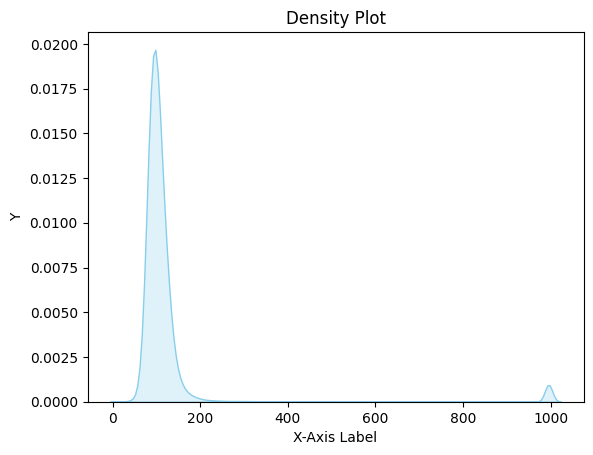

In [ ]:
# Create a density plot
sns.kdeplot(data=glu['shb70'], shade=True, color="skyblue")
plt.title("Density Plot")
plt.xlabel("X-Axis Label")
plt.ylabel("Y")
plt.show()

##shb19 - madic feature we get 0 = 787276 and 1 = 24257 from 825761 rows

In [ ]:
#re indexing
glu_medic = glu.reset_index(drop = True)

In [ ]:
#glu level after re- indexing
glu_medic['shb70']

0         116.0
1          83.0
2         278.0
3         154.0
4          74.0
          ...  
825756    105.0
825757    995.0
825758    125.0
825759    121.0
825760    138.0
Name: shb70, Length: 825761, dtype: float64

In [ ]:
glu_medic.loc[ind_15_16_df['shb19'].isnull()==False]
glu_medic[['shb19']]

,shb19
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
825756,0.0
825757,0.0
825758,0.0
825759,0.0


In [ ]:
#how many people taking medic
glu_medic[['shb19']].value_counts()

shb19
0.0      787276
1.0       24257
dtype: int64

#Analysis part

##Extract related feature

In [ ]:
#shb51,shb52,hv109,hv116
extracted_col = glu_medic[['hv005','hv021','hv023','hv105','hv115','hv104','hv106','hml18','shb70','ha40','ha53','ha55','shb13','hv206',
             'ha60','hc27','hb35','shdistri','hv025','hb40','hv252','shb16s','shb23s','shb27s','shb16d','shb23d','shb27d','hv270',
                        'shb19','hv024','hc53','hc55','hc56','hv026','hv219','ha57','hb60','shb51','shb52','hv109','hv116' ]]

##watching nan value and without nan values

In [ ]:
nan_counts = {}
non_nan_counts = {}
# Iterate through columns and calculate the sum of NaN values for each column
for column in extracted_col.columns:
    nan_count = extracted_col[column].isnull().sum()
    non_nan_count = len(extracted_col) - nan_count
    nan_counts[column] = nan_count
    non_nan_counts[column] = non_nan_count
# Print column names and their corresponding NaN counts
for column, nan_count in nan_counts.items():
    non_nan_count = non_nan_counts[column]
    print(f"Column '{column}' has {nan_count} NaN values and {non_nan_count} non-NaN values.")

Column 'hv005' has 0 NaN values and 825761 non-NaN values.
Column 'hv021' has 0 NaN values and 825761 non-NaN values.
Column 'hv023' has 0 NaN values and 825761 non-NaN values.
Column 'hv105' has 0 NaN values and 825761 non-NaN values.
Column 'hv115' has 0 NaN values and 825761 non-NaN values.
Column 'hv104' has 0 NaN values and 825761 non-NaN values.
Column 'hv106' has 0 NaN values and 825761 non-NaN values.
Column 'hml18' has 118837 NaN values and 706924 non-NaN values.
Column 'shb70' has 0 NaN values and 825761 non-NaN values.
Column 'ha40' has 125140 NaN values and 700621 non-NaN values.
Column 'ha53' has 114327 NaN values and 711434 non-NaN values.
Column 'ha55' has 114327 NaN values and 711434 non-NaN values.
Column 'shb13' has 14048 NaN values and 811713 non-NaN values.
Column 'hv206' has 0 NaN values and 825761 non-NaN values.
Column 'ha60' has 749200 NaN values and 76561 non-NaN values.
Column 'hc27' has 825761 NaN values and 0 non-NaN values.
Column 'hb35' has 713341 NaN valu

In [ ]:
extracted_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825761 entries, 0 to 825760
Data columns (total 41 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   hv005     825761 non-null  int64  
 1   hv021     825761 non-null  int64  
 2   hv023     825761 non-null  int64  
 3   hv105     825761 non-null  int64  
 4   hv115     825761 non-null  float64
 5   hv104     825761 non-null  int64  
 6   hv106     825761 non-null  int64  
 7   hml18     706924 non-null  float64
 8   shb70     825761 non-null  float64
 9   ha40      700621 non-null  float64
 10  ha53      711434 non-null  float64
 11  ha55      711434 non-null  float64
 12  shb13     811713 non-null  float64
 13  hv206     825761 non-null  int64  
 14  ha60      76561 non-null   float64
 15  hc27      0 non-null       float64
 16  hb35      112420 non-null  float64
 17  shdistri  825761 non-null  int64  
 18  hv025     825761 non-null  int64  
 19  hb40      111639 non-null  float64
 20  hv25

## Prengnancy check - hml18

### here we get,
*  0(no)-    673976
*  1(yes) -    32948




In [ ]:
extracted_col[['hml18']].value_counts()

hml18
0.0      673976
1.0       32948
dtype: int64

## Glucose Level for Individuals with Diabetes:

**Pregnant with fasting** : 60 - 90mg/dl+ is diabetes   (less than that normal)


*   link-




**Normal people with fasting** : 70 - 100 mg/dl+ diabetes (less than that nomral)
*   link- https://diabetesjournals.org/care/article/44/Supplement_1/S15/30859/2-Classification-and-Diagnosis-of-Diabetes

**Pregnant without fasting** : 100-126 mg/dl+ is diabetes

**Normal people without fasting** :

1. 126mg/dl+ is diabetes when they eat something (or without eating)
2. After 2 hour 200mg/dl is diabetes.


In [ ]:
extracted_col[['shb51']].value_counts()

shb51
0.0      195730
2.0      132161
3.0      118324
4.0      100725
1.0       87661
5.0       56711
6.0       36225
7.0       15873
8.0       10869
12.0       7929
14.0       6664
9.0        6435
13.0       5801
15.0       5294
10.0       5076
16.0       4218
11.0       3814
17.0       2361
18.0       1985
20.0        814
19.0        786
30.0        309
24.0        305
22.0        298
21.0        273
23.0        142
26.0        103
25.0         95
28.0         91
48.0         85
29.0         49
27.0         47
36.0         22
33.0         20
31.0         19
40.0         19
32.0         16
35.0         10
34.0          9
39.0          5
38.0          5
37.0          4
41.0          4
42.0          4
45.0          4
44.0          3
46.0          1
dtype: int64

In [ ]:
final_df=extracted_col.loc[extracted_col['hv105'] >= 18]

In [ ]:
final_diabetes =[]
for i in range(0,len(final_df)):
    if ((final_df.iloc[i]['shb70']>=126 and  (final_df.iloc[i]['shb51'] >=8 and final_df.iloc[i]['shb52'] >=8)) or final_df.iloc[i]['shb70']>=200) and final_df.iloc[i]['hv105'] >= 18:
      final_diabetes.append(1)
    else:
      final_diabetes.append(0)

In [ ]:
pd.DataFrame(final_diabetes).value_counts()

0    712482
1     24958
dtype: int64

In [ ]:
final_df['final_diabetes']=final_diabetes

<ipython-input-31-028a0ba2cd19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['final_diabetes']=final_diabetes


In [ ]:
final_df.to_csv('/content/drive/MyDrive/DHS/Diabetes/Data/India/final_data.csv',index=False)

In [ ]:
final_df

,hv005,hv021,hv023,hv105,hv115,hv104,hv106,hml18,shb70,ha40,...,hc56,hv026,hv219,ha57,hb60,shb51,shb52,hv109,hv116,final_diabetes
0,191072,10001,64010,46,1.0,2,0,0.0,116.0,2295.0,...,NaN,NaN,1,2.0,NaN,2.0,13.0,0,1.0,0
1,191072,10001,64010,20,0.0,2,3,0.0,83.0,2203.0,...,NaN,NaN,1,3.0,NaN,2.0,13.0,5,0.0,0
2,191072,10001,64010,40,1.0,2,1,0.0,278.0,2611.0,...,NaN,NaN,2,3.0,NaN,1.0,8.0,2,1.0,1
3,191072,10001,64010,21,0.0,2,3,0.0,154.0,3575.0,...,NaN,NaN,2,4.0,NaN,2.0,24.0,5,0.0,0
4,191072,10001,64010,19,0.0,2,3,0.0,74.0,1988.0,...,NaN,NaN,2,4.0,NaN,5.0,24.0,5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825756,2270734,360482,54122,47,0.0,2,2,0.0,105.0,NaN,...,NaN,NaN,2,3.0,NaN,0.0,6.0,3,0.0,0
825757,2270734,360482,54122,52,3.0,1,1,NaN,995.0,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,1,2.0,1
825758,2270734,360482,54122,23,1.0,2,2,0.0,125.0,2145.0,...,NaN,NaN,1,3.0,NaN,12.0,0.0,4,1.0,0
825759,2270734,360482,54122,46,1.0,2,0,0.0,121.0,2489.0,...,NaN,NaN,1,3.0,NaN,0.0,5.0,0,1.0,0
